# Final Project: Thyroid Disease Diagnosis

>Names: Gabi Rivera, Joel Day, and Marvin Moran
>
>Date: 01Oct2023
>
>Course: ADS505

### Imported Packages

In [26]:
import pandas as pd
import numpy as np
!#pip install GitPython
import git
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from dython.nominal import associations

import klib
import seaborn as sns
import matplotlib.pyplot as plt


### Copy Github Repo

def download_github_repository(repo_url, destination_folder):
    try:
        git.Git(destination_folder).clone(repo_url)
        print(f"Repository successfully downloaded to {destination_folder}")
    except git.exc.GitCommandError as e:
        print(f"Error downloading the repository: {e}")

repo_owner = 'Riverag0011'
repo_name = 'ADS505_Team-4'
repository_url = f"https://github.com/{repo_owner}/{repo_name}"
destination_folder = "/content/sample_data"
download_github_repository(repository_url, destination_folder)

### Import Dataset and General Information: 

In [2]:
csv_name = 'thyroidDF'
df = pd.read_csv('thyroidDF.csv')
df.columns = df.columns.str.replace(' ', '_')

display(df.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

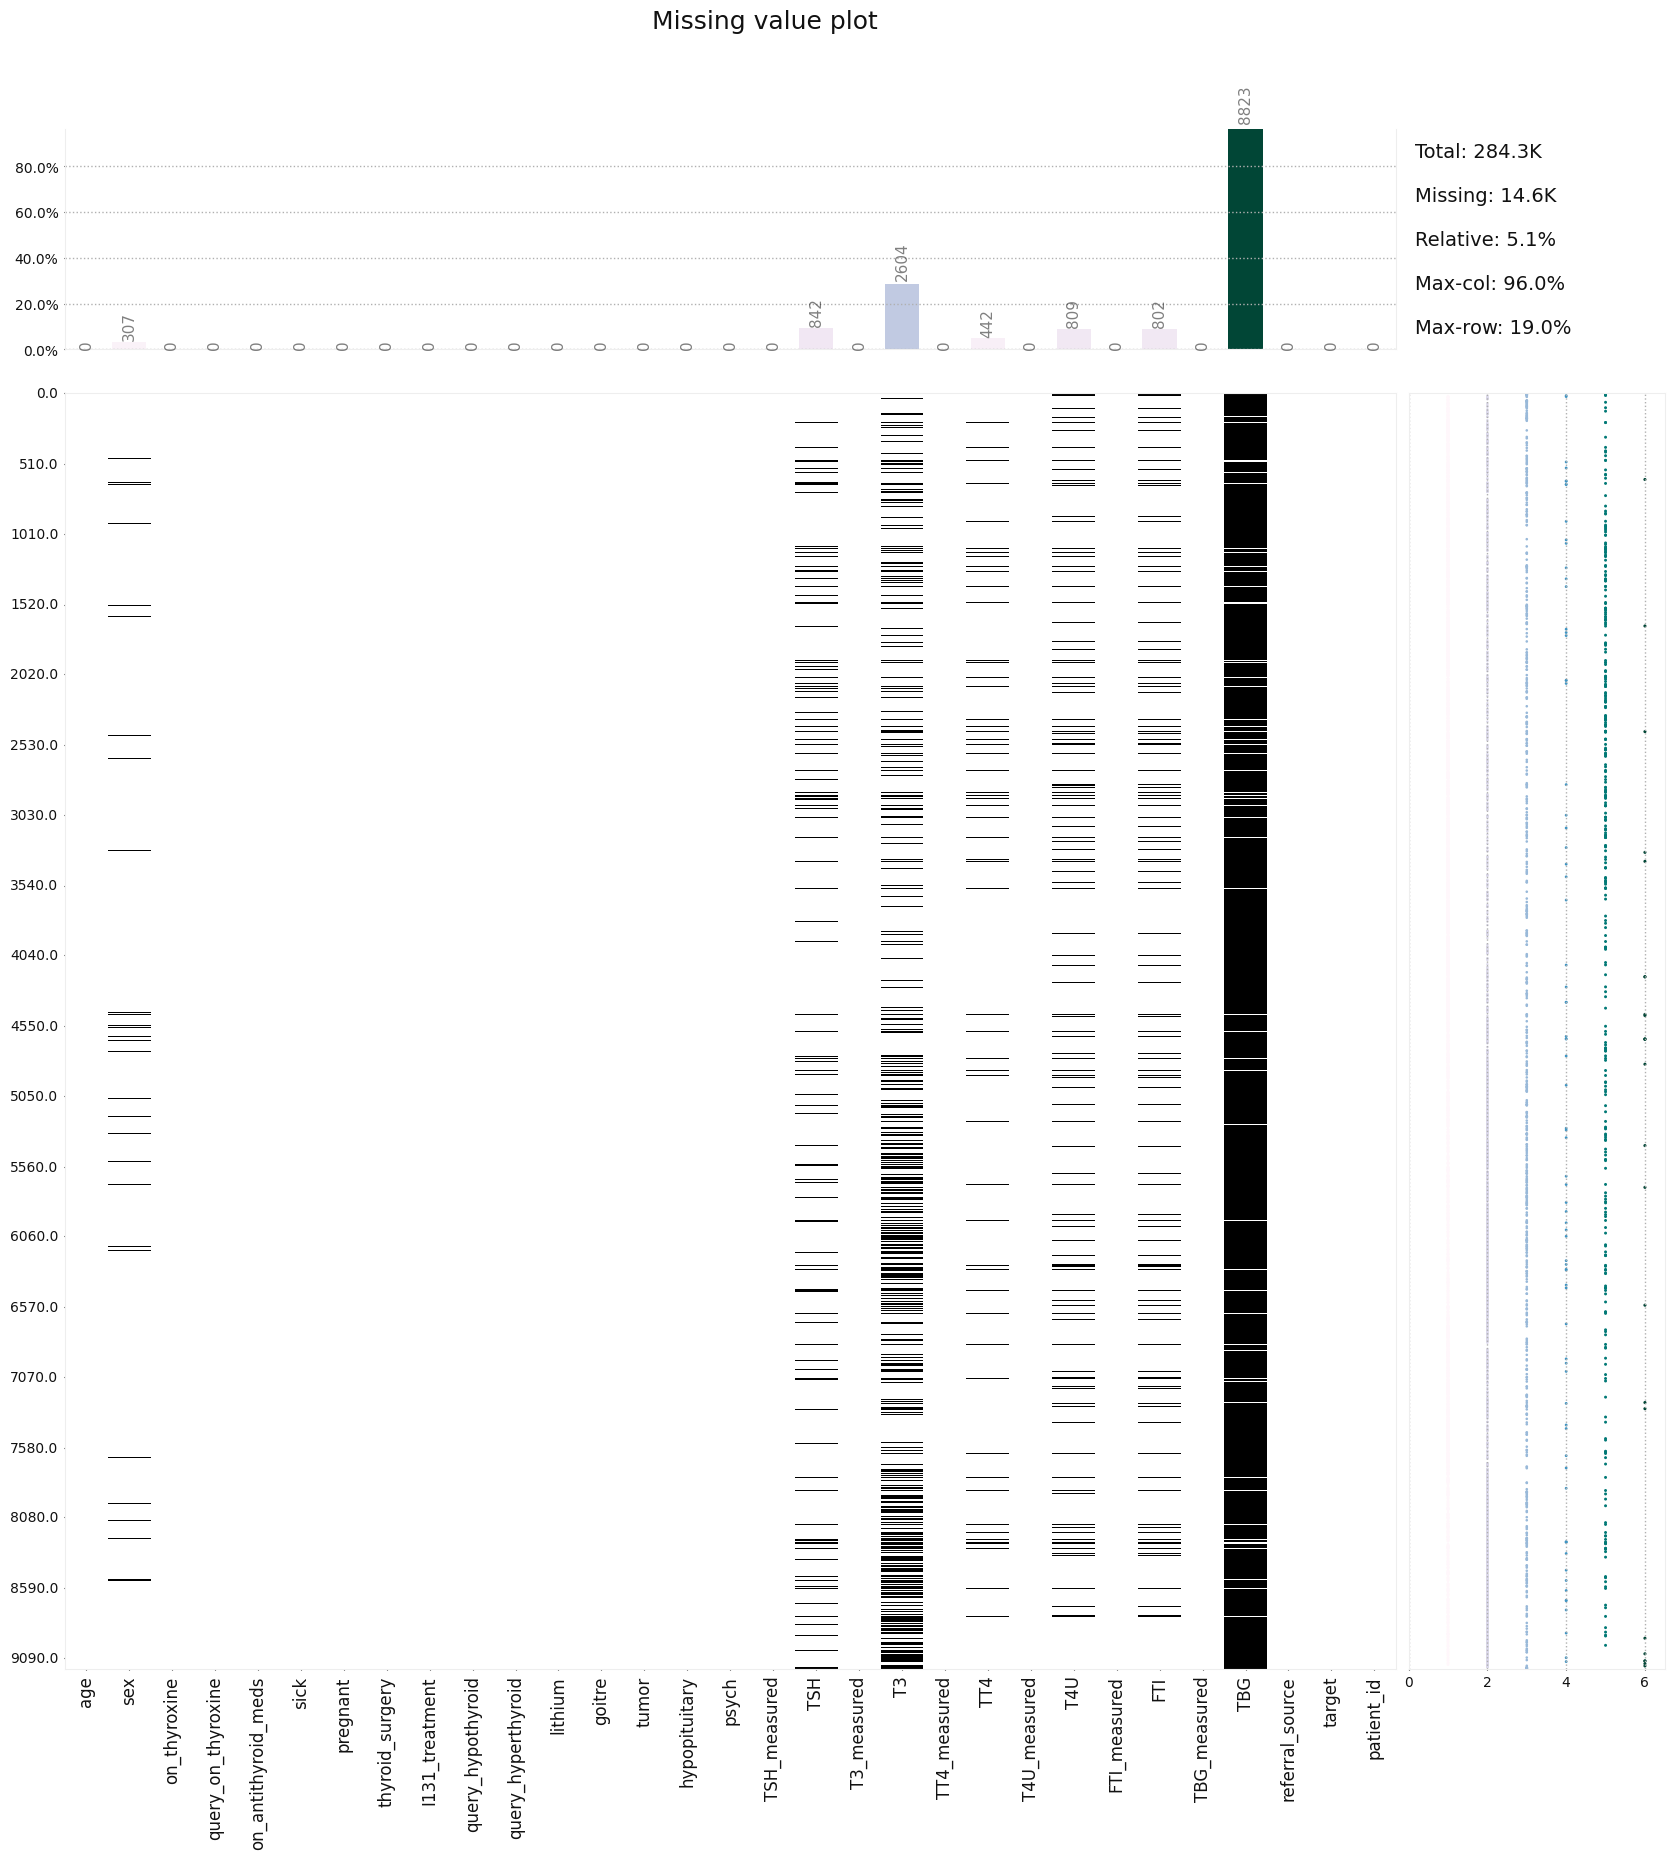

In [3]:
# Identify missing value frequencies: 

display(df.info())
df.replace('', np.nan, inplace=True)
klib.missingval_plot(df)

### Initial Data Preparation: 

In [4]:
# Drop columns that have >= 40% missing values as well as those that aren't as relevant to the study:

df = df.drop(['TBG', 'TBG_measured', 'query_hypothyroid', 'query_hyperthyroid'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   lithium              9172 non-null   object 
 10  goitre               9172 non-null   object 
 11  tumor                9172 non-null   object 
 12  hypopituitary        9172 non-null   object 
 13  psych                9172 non-null   object 
 14  TSH_measured         9172 non-null   object 
 15  TSH                  8330 non-null   f

<AxesSubplot: xlabel='patient_id', ylabel='Density'>

GridSpec(6, 20)

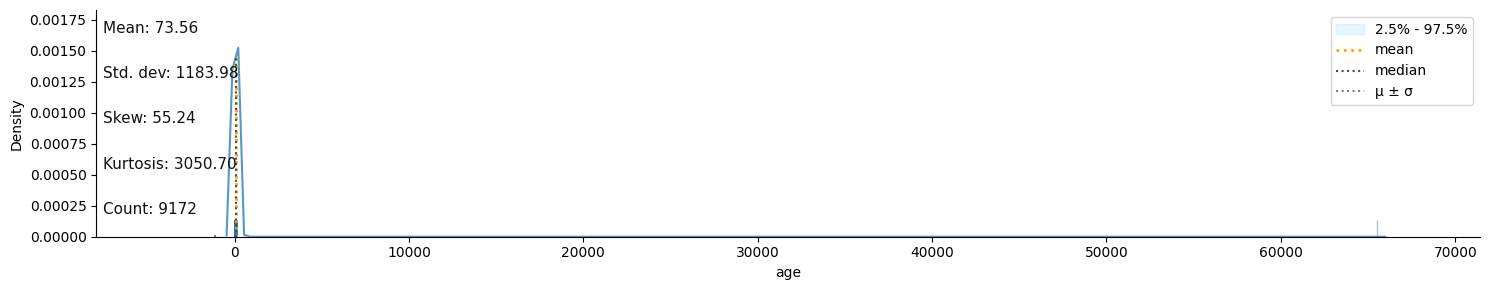

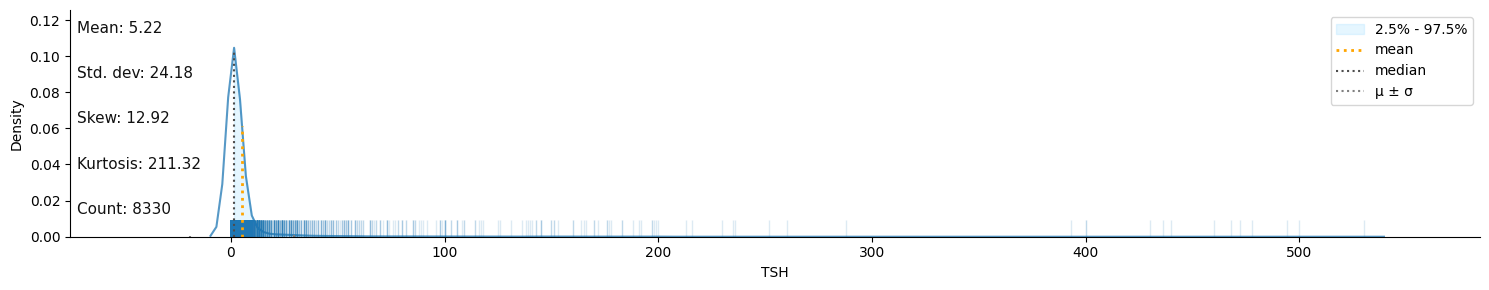

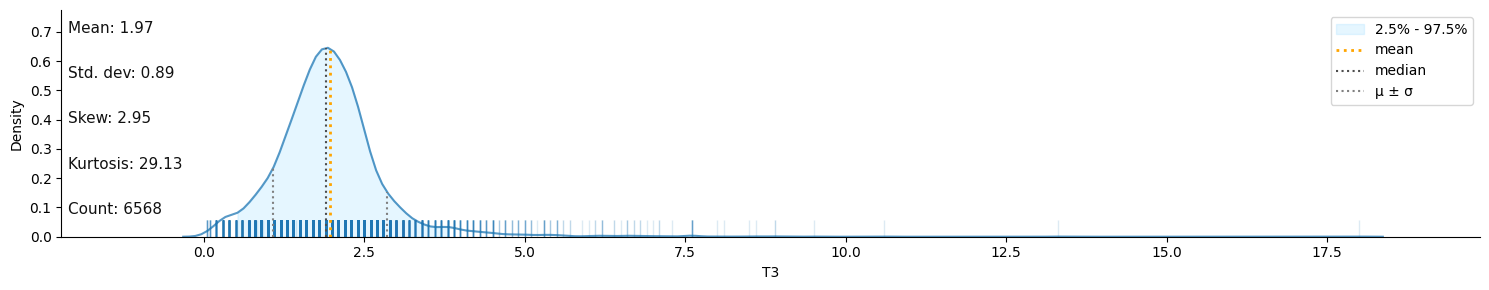

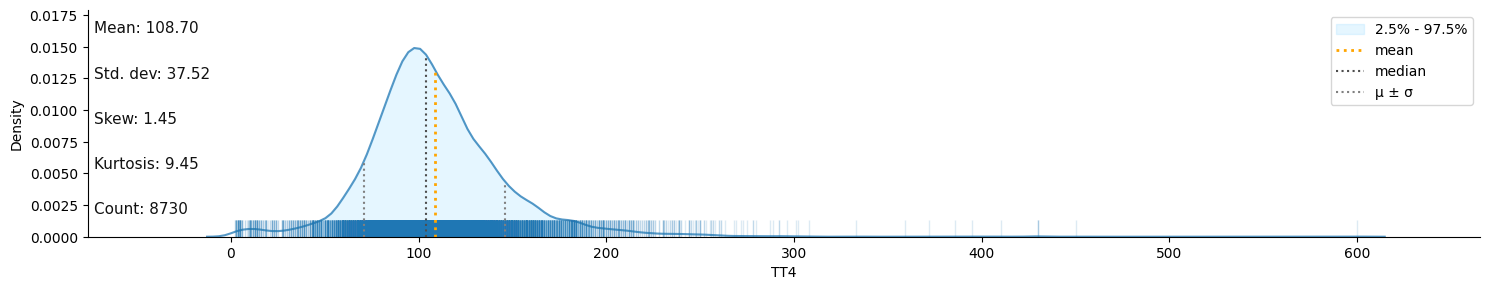

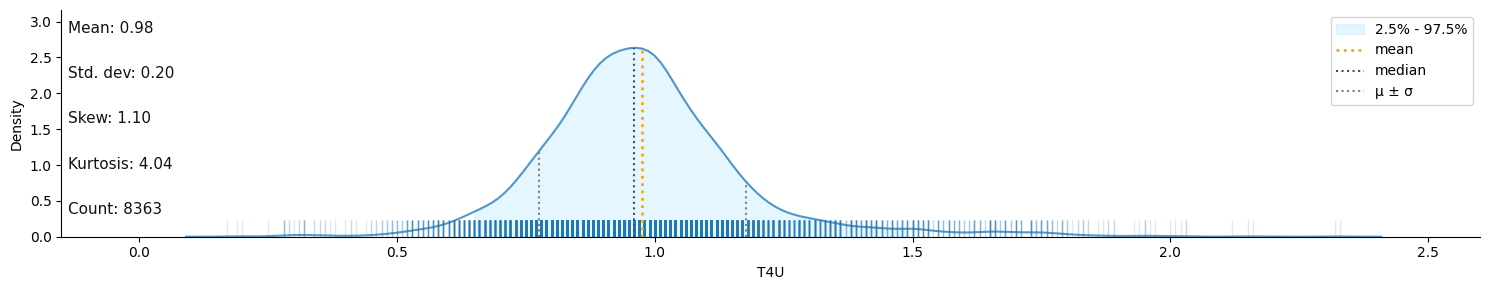

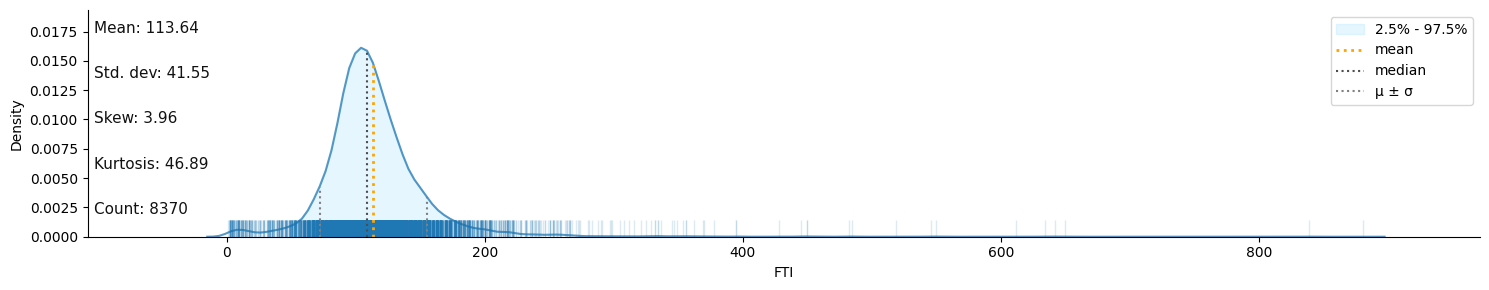

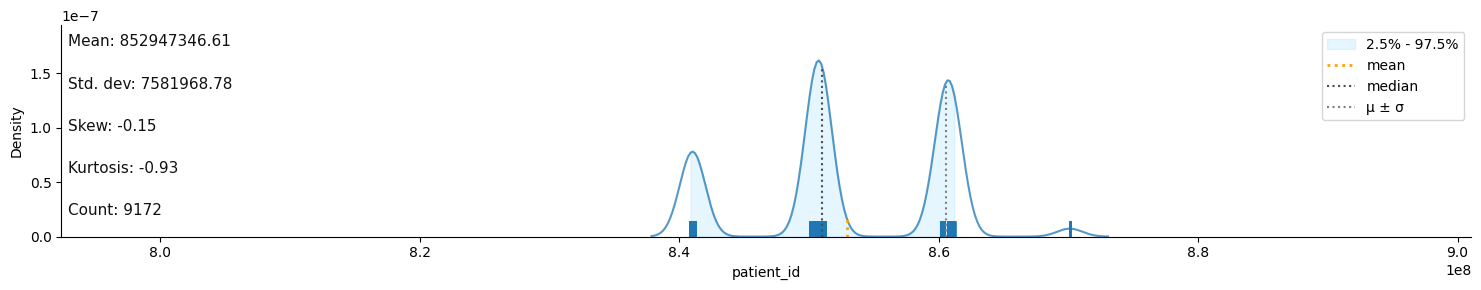

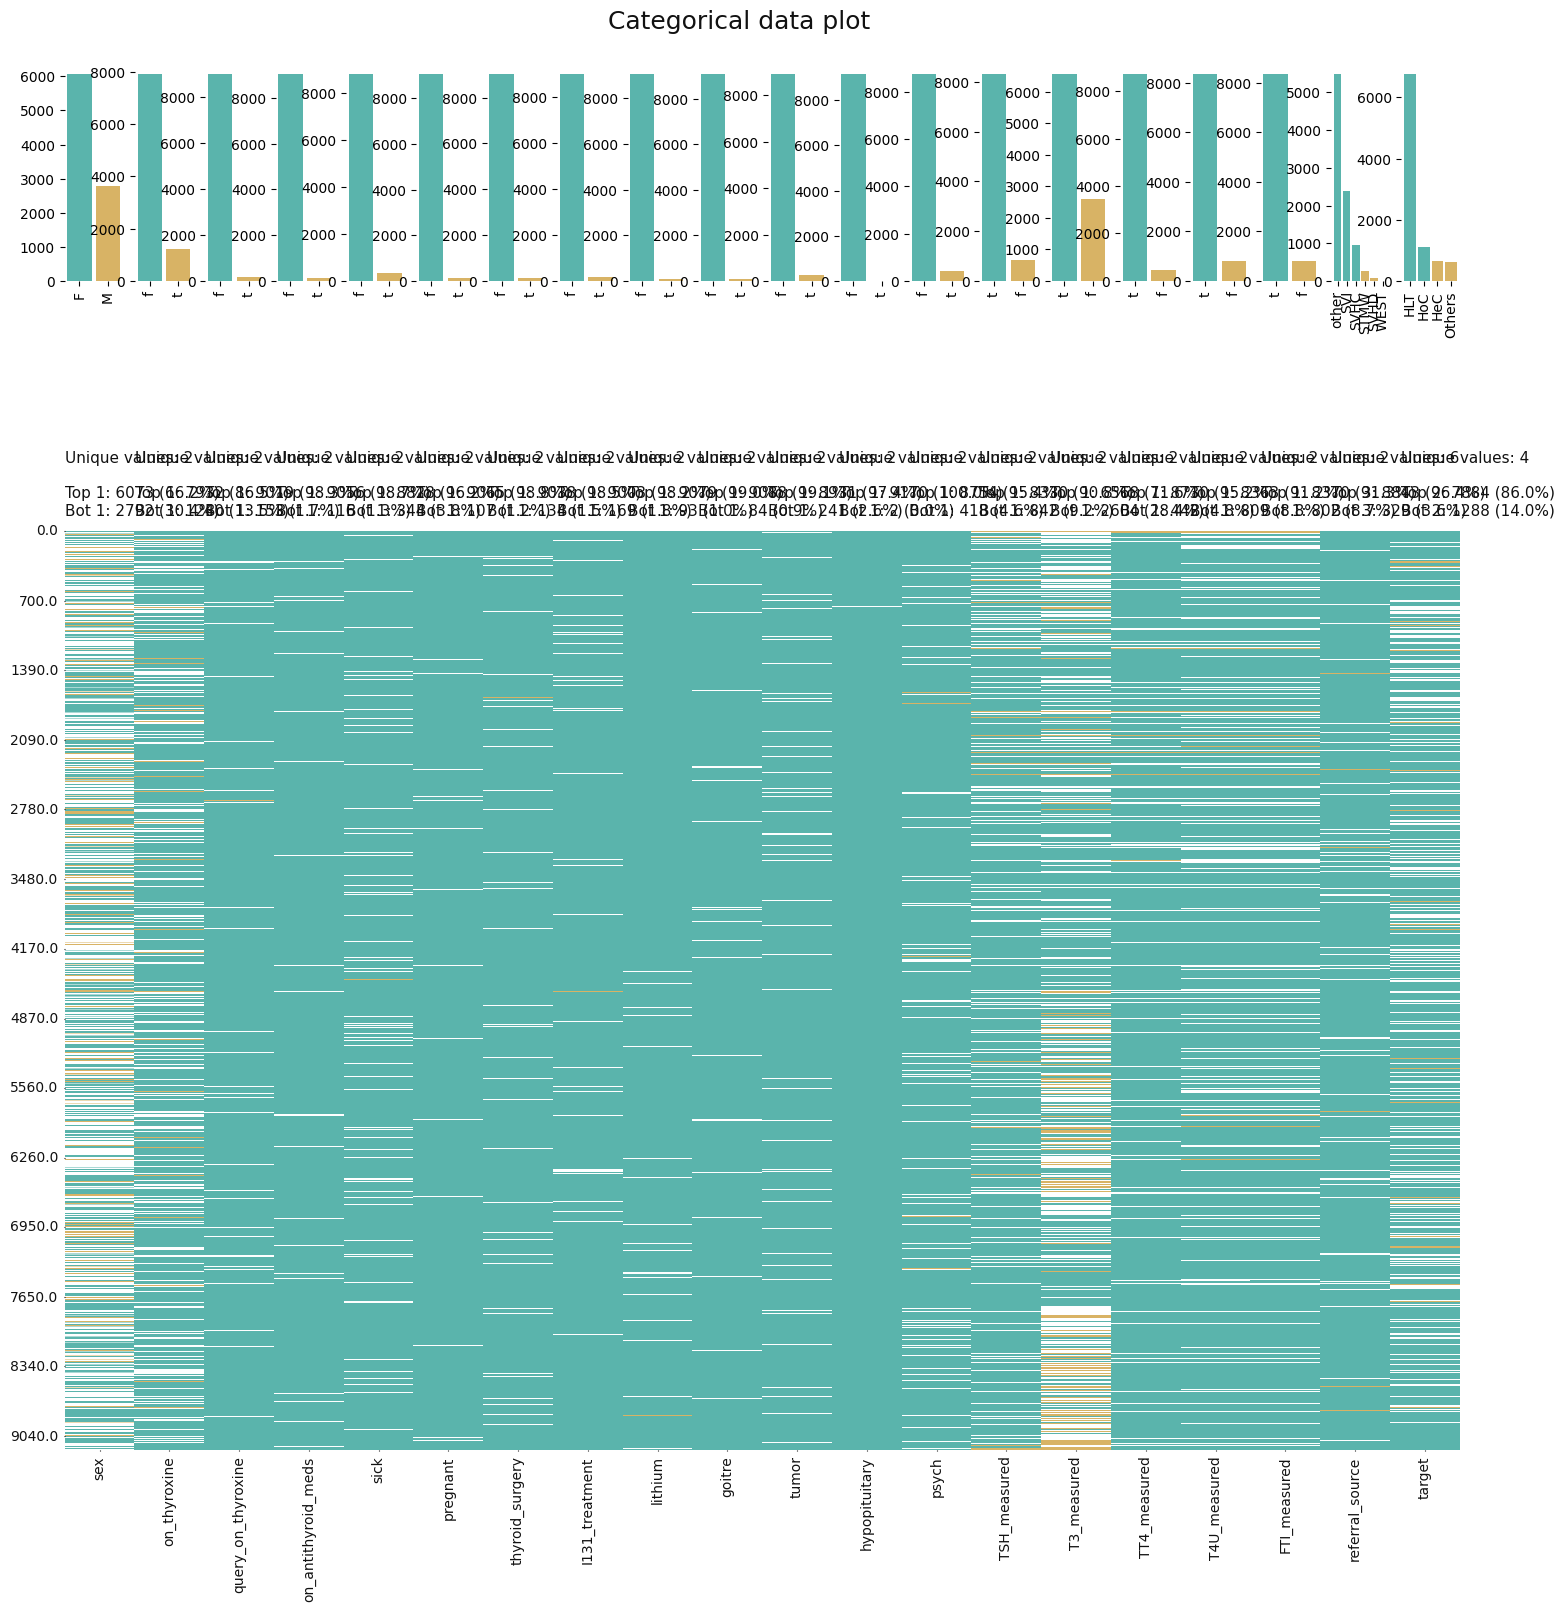

In [6]:
# Visualize distributions: 

display(klib.dist_plot(df))
display(klib.cat_plot(df))

In [7]:
# Measures of Centrality: 

display(df.describe())
display(df['sex'].mode())
display(df['TSH'].mode())
display(df['T3'].mode())
display(df['TT4'].mode())
display(df['T4U'].mode())
display(df['FTI'].mode())

,age,TSH,T3,TT4,T4U,FTI,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,8.701190e+08


0    F
Name: sex, dtype: object

0    0.1
Name: TSH, dtype: float64

0    1.8
1    2.0
Name: T3, dtype: float64

0    101.0
Name: TT4, dtype: float64

0    0.96
Name: T4U, dtype: float64

0    107.0
Name: FTI, dtype: float64

In [8]:
# Replace attribute having <= 40% missing date with appropriate measurement of centrality: 


df['sex'] = df['sex'].replace(np.nan, 'F', regex = True) #Mode
df['TSH'] = df['TSH'].replace(np.nan, '1.4', regex = True) #Median
df['T3'] = df['T3'].replace(np.nan, '1.9', regex = True) #Median
df['TT4'] = df['TT4'].replace(np.nan, '101.0', regex = True) #Mode
df['T4U'] = df['T4U'].replace(np.nan, '0.96', regex = True) #Median
df['FTI'] = df['FTI'].replace(np.nan, '107.0', regex = True) #Median


display(df.info())
display(klib.missingval_plot(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  9172 non-null   int64 
 1   sex                  9172 non-null   object
 2   on_thyroxine         9172 non-null   object
 3   query_on_thyroxine   9172 non-null   object
 4   on_antithyroid_meds  9172 non-null   object
 5   sick                 9172 non-null   object
 6   pregnant             9172 non-null   object
 7   thyroid_surgery      9172 non-null   object
 8   I131_treatment       9172 non-null   object
 9   lithium              9172 non-null   object
 10  goitre               9172 non-null   object
 11  tumor                9172 non-null   object
 12  hypopituitary        9172 non-null   object
 13  psych                9172 non-null   object
 14  TSH_measured         9172 non-null   object
 15  TSH                  9172 non-null   object
 16  T3_mea

None

No missing values found in the dataset.


None

In [9]:
# Correct numerical attribute's datatype back to float: 

df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   lithium              9172 non-null   object 
 10  goitre               9172 non-null   object 
 11  tumor                9172 non-null   object 
 12  hypopituitary        9172 non-null   object 
 13  psych                9172 non-null   object 
 14  TSH_measured         9172 non-null   object 
 15  TSH                  9172 non-null   f

None

In [5]:
# Replace target classes "-" to healthy: 

df.loc[df["target"] == "-", "target"] = 'HLT'


# Combine appropriate target classes to identify hyperthyrodism: 

df.loc[df["target"] == "A", "target"] = 'HeC'
df.loc[df["target"] == "B", "target"] = 'HeC'
df.loc[df["target"] == "C", "target"] = 'HeC'
df.loc[df["target"] == "D", "target"] = 'HeC'
df.loc[df["target"] == "D|R", "target"] = 'HeC'
df.loc[df["target"] == "AK", "target"] = 'HeC'
df.loc[df["target"] == "T", "target"] = 'HeC'
df.loc[df["target"] == "O", "target"] = 'HeC'
df.loc[df["target"] == "P", "target"] = 'HeC'
df.loc[df["target"] == "Q", "target"] = 'HeC'
df.loc[df["target"] == "J", "target"] = 'HeC'
df.loc[df["target"] == "LJ", "target"] = 'HeC'
df.loc[df["target"] == "KJ", "target"] = 'HeC'

df.loc[df["target"] == "L", "target"] = 'HeC'
df.loc[df["target"] == "M", "target"] = 'HeC'
df.loc[df["target"] == "MK", "target"] = 'HeC'
df.loc[df["target"] == "N", "target"] = 'HeC'


# Combine appropriate target classes to identify hypothyrodism: 

df.loc[df["target"] == "E", "target"] = 'HoC'
df.loc[df["target"] == "F", "target"] = 'HoC'
df.loc[df["target"] == "FK", "target"] = 'HoC'
df.loc[df["target"] == "G", "target"] = 'HoC'
df.loc[df["target"] == "GKJ", "target"] = 'HoC'
df.loc[df["target"] == "GI", "target"] = 'HoC'
df.loc[df["target"] == "GK", "target"] = 'HoC'
df.loc[df["target"] == "H", "target"] = 'HoC'
df.loc[df["target"] == "H|K", "target"] = 'HoC'
df.loc[df["target"] == "S", "target"] = 'HoC'
df.loc[df["target"] == "I", "target"] = 'HoC'
df.loc[df["target"] == "OI", "target"] = 'HoC'
df.loc[df["target"] == "MI", "target"] = 'HoC'
df.loc[df["target"] == "C|I", "target"] = 'HoC'


# Create others bucket: 

df.loc[df["target"] == "K", "target"] = 'Others'
df.loc[df["target"] == "R", "target"] = 'Others'



display(df['target'].unique)

0       HLT
1       HLT
2       HLT
3       HLT
4       HoC
       ... 
9167    HLT
9168    HLT
9169    HoC
9170    HLT
9171    HLT
Name: target, Length: 9172, dtype: object

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,other,HLT,840801013
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,other,HLT,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,other,HLT,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,other,HLT,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,other,HoC,840803047


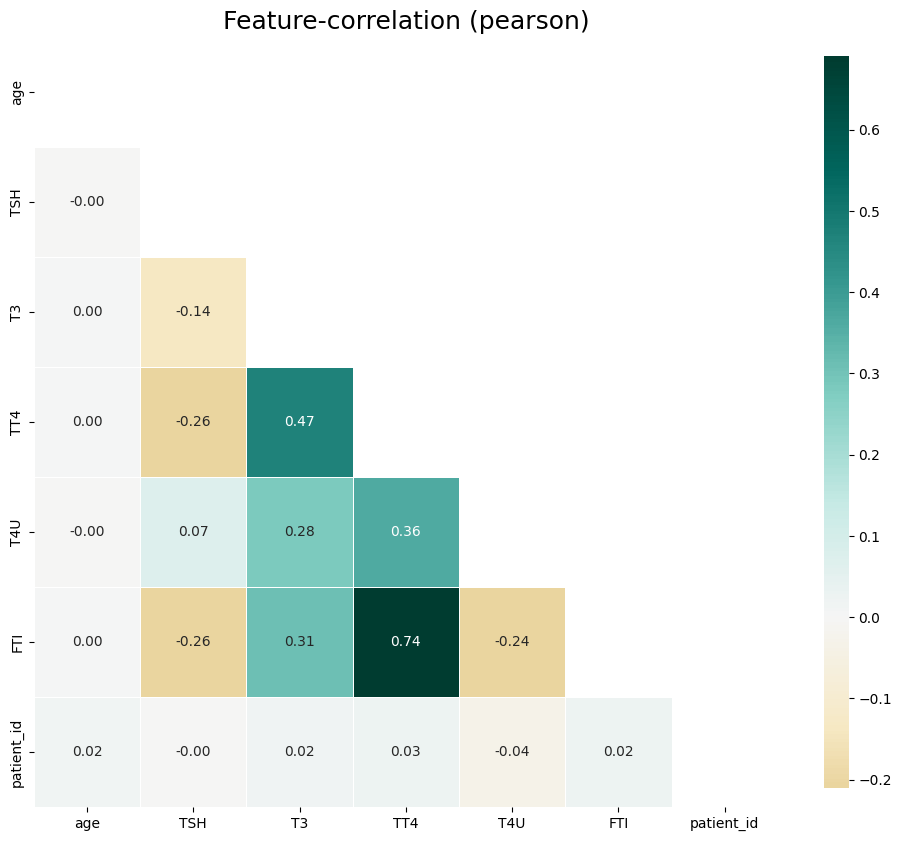

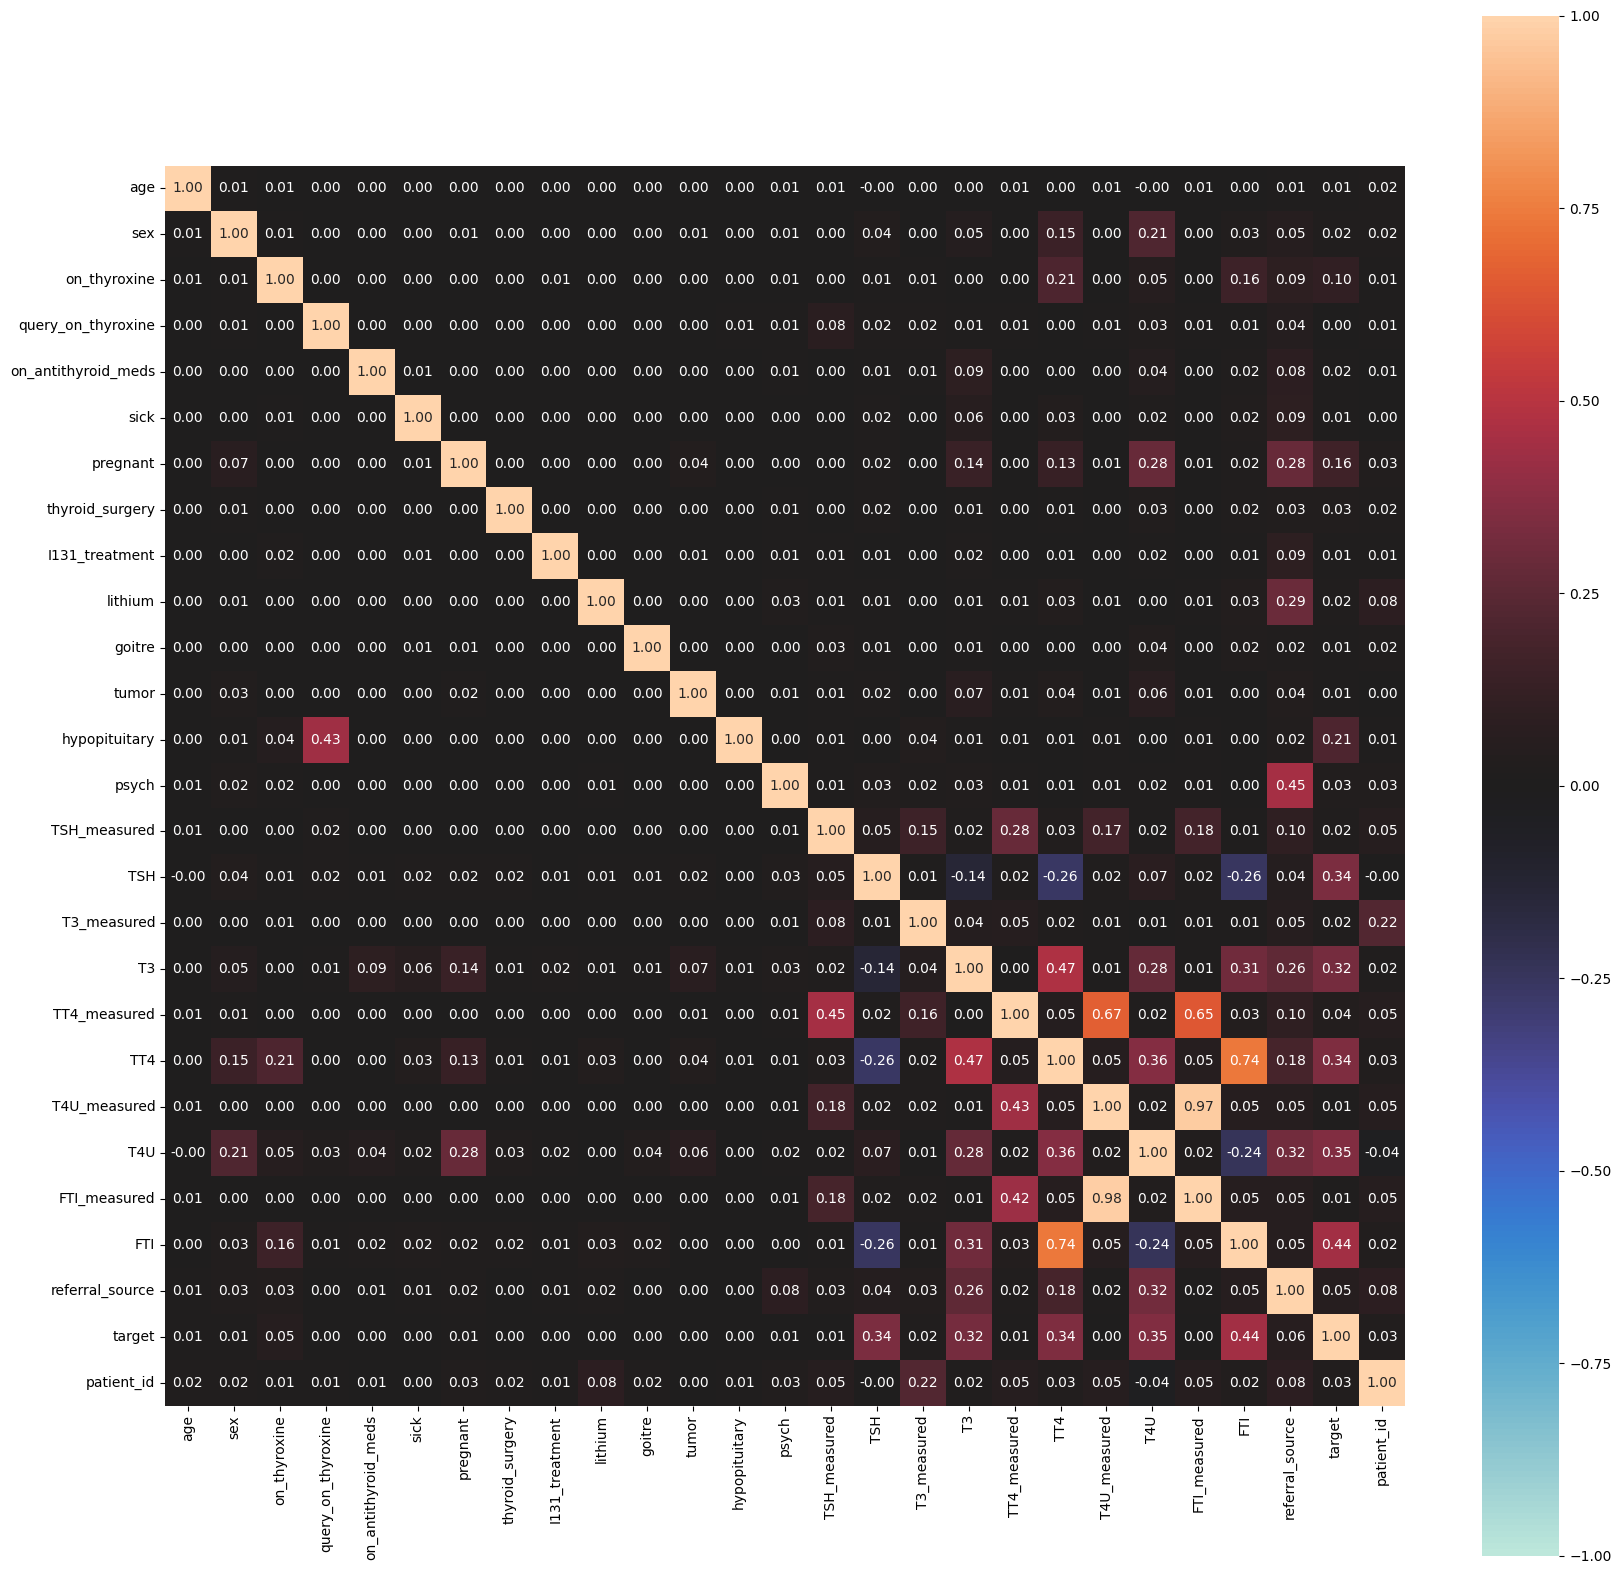

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.014178      0.007095            0.002530   
 sex                  0.014178  1.000000      0.008941            0.001546   
 on_thyroxine         0.007095  0.013871      1.000000            0.000082   
 query_on_thyroxine   0.002530  0.011199      0.000385            1.000000   
 on_antithyroid_meds  0.002831  0.004556      0.000874            0.003156   
 sick                 0.002415  0.000255      0.008955            0.000211   
 pregnant             0.003892  0.067135      0.000815            0.001807   
 thyroid_surgery      0.002631  0.011320      0.002001            0.000175   
 I131_treatment       0.001645  0.000511      0.021638            0.003406   
 lithium              0.002361  0.007453      0.000230            0.003027   
 goitre               0.002733  0.000148      0.000044            0.001484   
 tumor                0.003746  0.028036      0.000357  

In [28]:
# Correlation matrix for continues features:

klib.corr_plot(df)


# Correlation matric for categorical features: 
#Dython library calculates correlation between categorical variables. Method applied is Theil U.

associations(df, nom_nom_assoc = "theil", multiprocessing = True, figsize = (20,20))

### Initial EDA

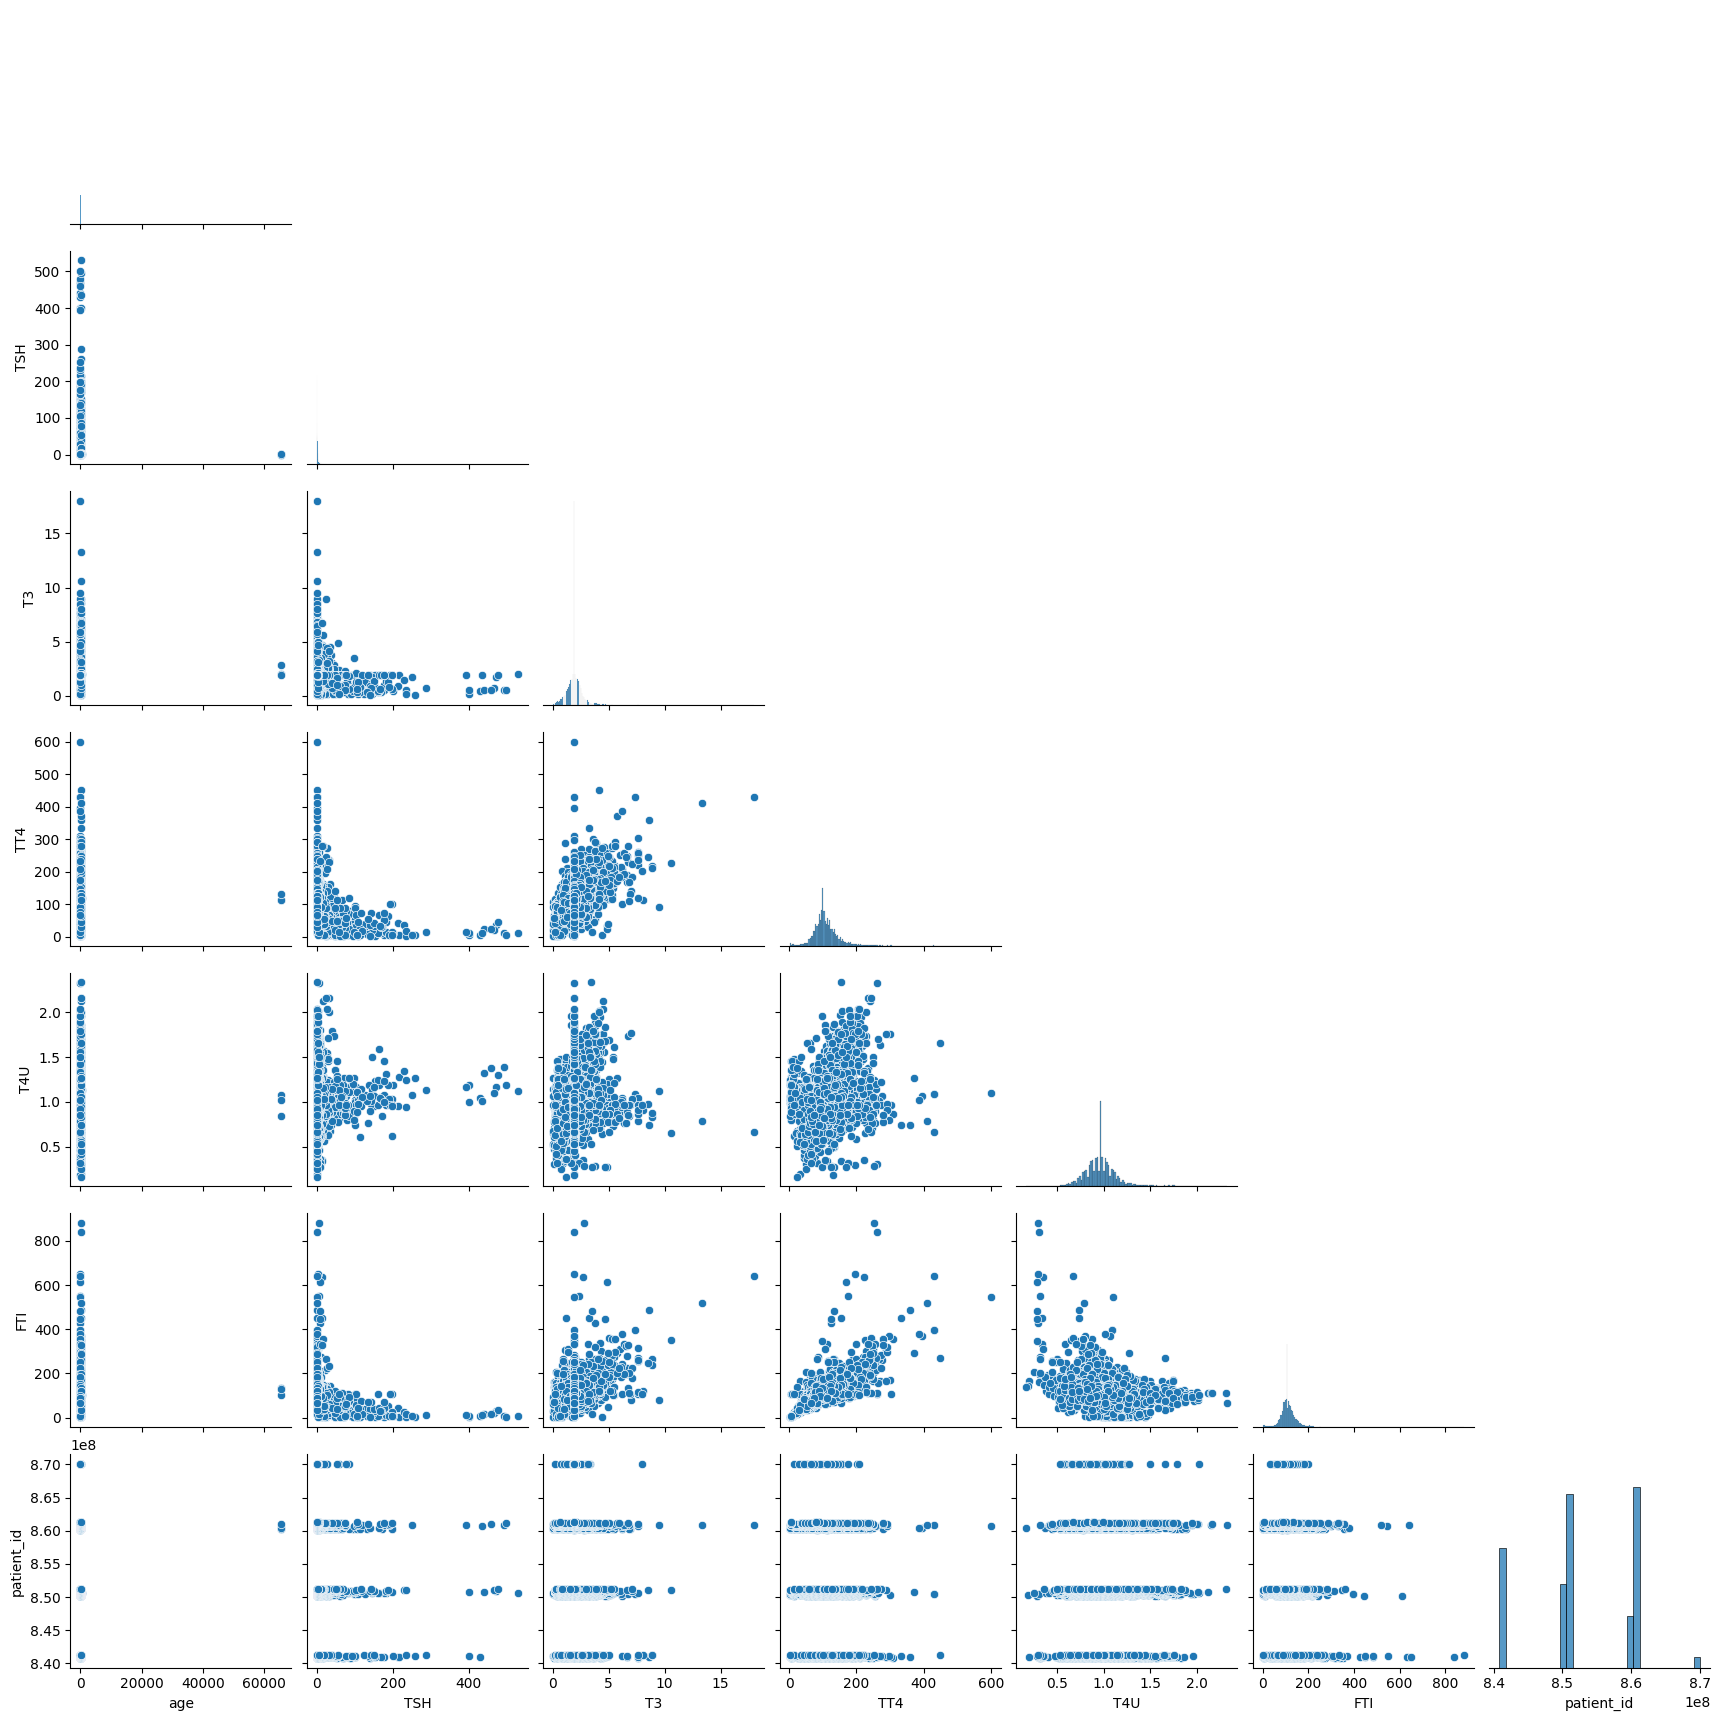

In [10]:
# General Pairplot of continues attributes: 

sns.pairplot(df, corner=True)

Text(0.5, 1.0, 'Target Frequencies by Gender')

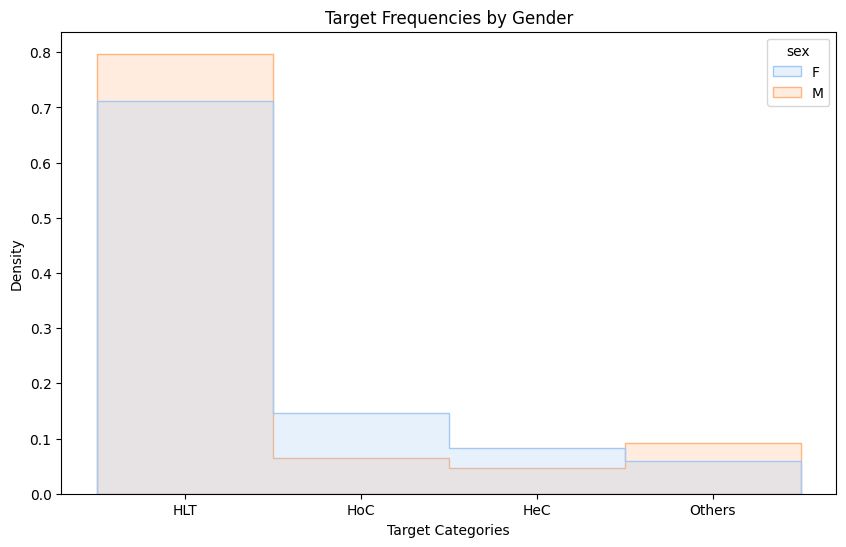

In [11]:
# Target Frequencies by Gender:

sns.histplot(data=df, x="target", hue="sex", stat="density",
             element="step", palette = "pastel",
             common_norm=False)

plt.gcf().set_size_inches(10, 6)
plt.xlabel('Target Categories')
plt.ylabel('Density')
plt.title("Target Frequencies by Gender")

Text(0.5, 1.0, 'TT4 Relation to T4U Differentiated by target')

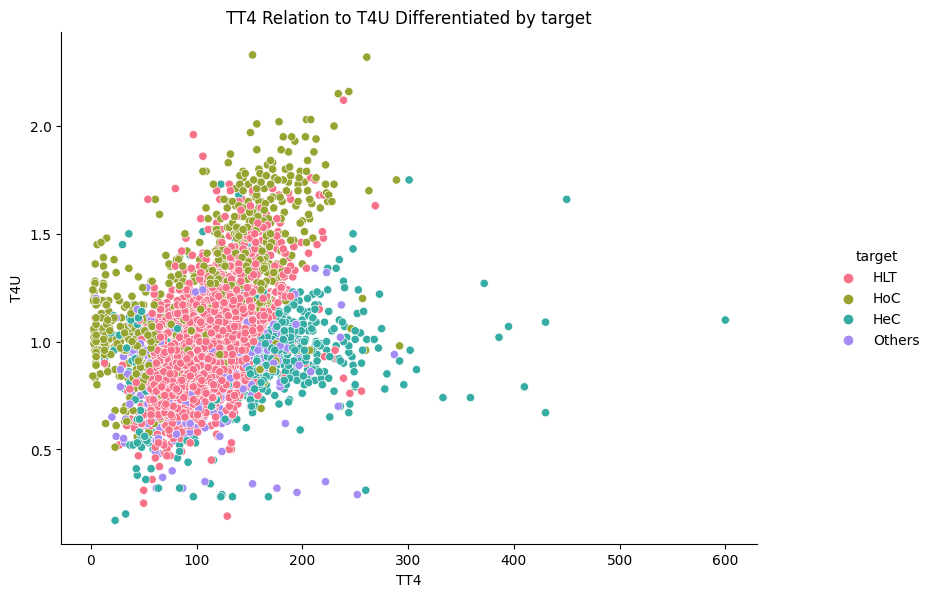

In [23]:
# TT4 Relation to T4U Differentiated by target

sns.relplot(data=df, x="TT4", y="T4U", hue="target", palette = "husl", 
           kind="scatter")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title("TT4 Relation to T4U Differentiated by target")

Text(0.5, 1.0, 'TSH Relation to target by Gender')

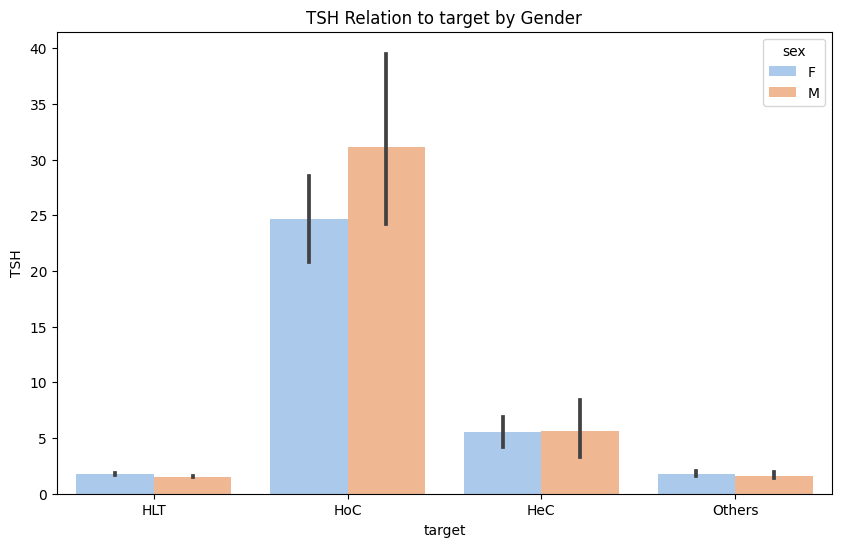

In [36]:
# TSH Relation to target by Gender

sns.barplot(data=df, x="target", y="TSH", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TSH')
plt.title("TSH Relation to target by Gender")

Text(0.5, 1.0, 'TT4 Relation to target by Gender')

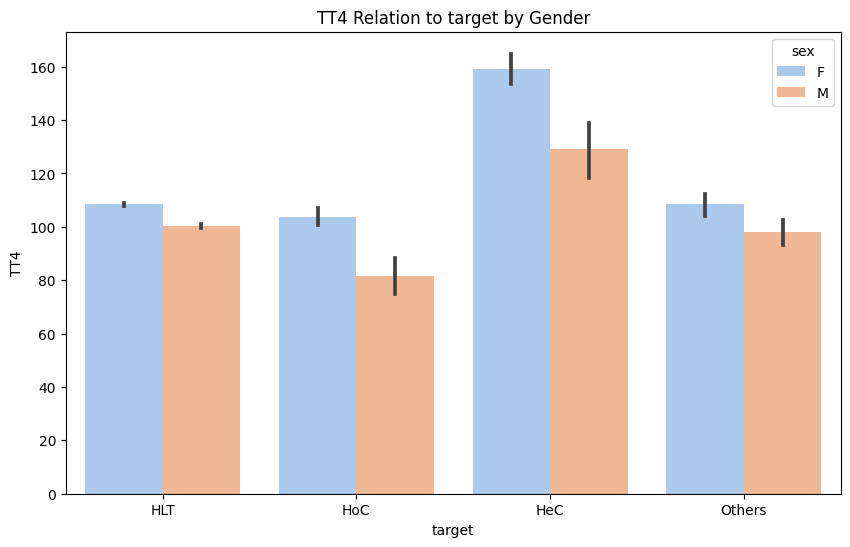

In [40]:
# TT4 Relation to target by Gender

sns.barplot(data=df, x="target", y="TT4", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TT4')
plt.title("TT4 Relation to target by Gender")

Text(0.5, 1.0, 'T4U Relation to target by Gender')

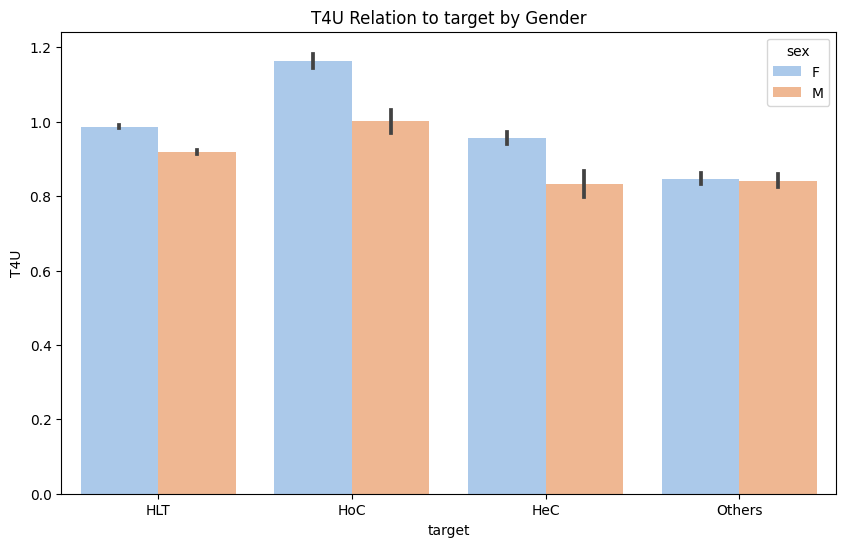

In [41]:
# T4U Relation to target by Gender

sns.barplot(data=df, x="target", y="T4U", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('T4U')
plt.title("T4U Relation to target by Gender")

Text(0.5, 1.0, 'FTI Relation to target by Gender')

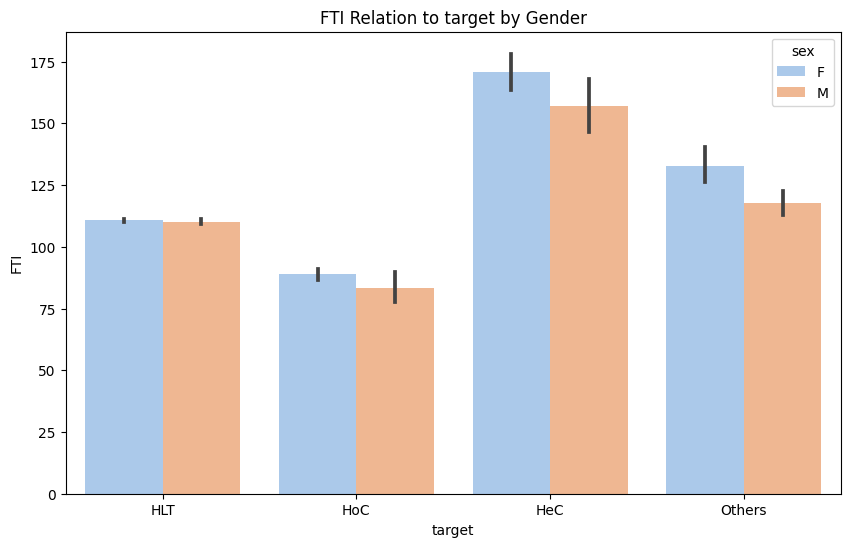

In [42]:
# FTI Relation to target by Gender

sns.barplot(data=df, x="target", y="FTI", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('FTI')
plt.title("FTI Relation to target by Gender")

In [14]:
=========

SyntaxError: invalid syntax (1763773627.py, line 1)

## All datatypes

(Data Preparation Continued)

## Adjust Datatypes and drop NAs


In [ ]:
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'percent': percent, 'sum': sum, 'datatype': dtype})
na

## change age to float because it is continuous and then scale using Standard Scaler()

In [ ]:
df['age'] = df['age'].astype(float)
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

### 'sex' should be ant int with only 0's and 1's. missing rows are only 3 percent of data so lets drop them as well.

In [ ]:
df['sex'].value_counts()

In [ ]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].value_counts()

In [ ]:
df = df[df['sex'] != 2]

In [ ]:
df['sex'].value_counts()

## regroup and look at df again

In [ ]:
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'percent': percent, 'sum': sum, 'datatype': dtype})
na

## Lets transform the rest of the boolean features in the same manner as we did for sex. They are all currently objects so lets retrive them this way and transform them all with the label encoder in a similar manner to 'sex'

In [ ]:
df['on_thyroxine'].value_counts()

In [ ]:
dtype_obj = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
for col in dtype_obj:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
for col in dtype_obj:
  x = df[col].value_counts()
  print(x)

## regroup

In [ ]:
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'percent': percent, 'sum': sum, 'datatype': dtype})
na

## NA
### Due to the presecnce of na values and the redududancy of information the following 6 columns will be dropped.

In [ ]:
df.select_dtypes(include=['float64']).columns.tolist()

In [ ]:
columns_to_drop = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
df = df.drop(columns=columns_to_drop).copy()

# Final DF

In [ ]:
df